# Notebook 10

## Solución numérica de EDO (parte 3)

#### Python 🐍

> Dr. Ricardo Méndez Fragoso $\mathbb{R} i \vec c \hbar$

### Método de Runge-Kutta

A diferencia de los en los dos notebook's anteriores, en éste se verá una forma implícita de realizar la integración de ecuaciones diferenciales. Primero comenzaremos importando las bibliotecas que utilizaremos a lo largo del notebook.

In [1]:
from pylab import *

#### Método de Runge-Kutta de segundo orden

Los métodos implícitos de integración de EDO's son ampliamente utilizados por su sencillez y precisión, ya que se caracterizan por únicamente utilizar el sistema de EDO's y sus interpolaciones. Uno de los métodos implícitos más utilizado son los de tipo Runge-Kutta. Como se explica en las [notas del curso](http://sistemas.fciencias.unam.mx/~rich/FisComp/), estos métodos se basan en el cálculo de la integral de la siguiente ecuación:

$$
\vec x_{n+1} = \vec x_n + \int _{t_n} ^{t_{n+1}} \vec g(\vec x ,t)dt
$$

Uno de los primeros métodos de este estilo es el siguiente, llamado también de Runge-Kutta de segundo orden:

$$
\vec x_{n+1} = \vec x_{n} + \delta \vec g (\vec x_{n+\frac{1}{2}},t_{n+\frac{1}{2}})
$$
donde 
$$
\vec x_{n+\frac{1}{2}} = \vec x_{n} + \frac{\delta}{2} \vec g (\vec x_{n},t_{n}) \\
t_{n+\frac{1}{2}} = t_n + \frac{\delta}{2}
$$

Típicamente los métodos implícitos de este estilo se escriben de la siguiente manera:

$$
\vec x_{n+1} = \vec x_n + \delta \vec g \left( \vec x_{n} + \frac{1}{2} \vec k_1,t_n +\frac{\delta}{2} \right) \\
\vec k_1 = \delta \vec g (\vec x_{n},t_{n})
$$

Como se puede observar, el método únicamente depende del sistema de EDO's representado por $\vec g (\vec , t)$. Con la siguiente función se puede implementar este método de integración.

In [2]:
def RK_2(edo,x_ini,t):
    sol = zeros( (len(t) , len(x_ini)) )
    sol[0,:] = x_ini
    delta = t[1]-t[0]
    for i in range(0,len(t)-1):
        k1 = sol[i,:] + 0.5*delta*edo(sol[i,:],t[i])
        sol[i+1,:] = sol[i,:] + delta*edo(k1,t[i]+0.5*delta)
    return sol

Probemos el algoritmo anterior con el modelo de crecimiento/decrecimiento exponencial con la siguiente función:

In [3]:
def modelo_exp(P,t,a=0.1):
    return a*P

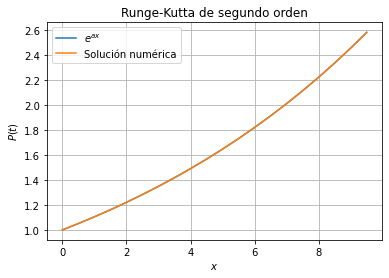

In [4]:
tiempo = arange(0,10,0.5)
sol_num = RK_2(modelo_exp,[1],tiempo)
title("Runge-Kutta de segundo orden"),xlabel("$x$"),ylabel("$P(t)$")
plot(tiempo,exp(0.1*tiempo),label="$e^{ax}$")
plot(tiempo,sol_num,label="Solución numérica")
grid(), legend()
show()

También podemos probar con el modelo logístico representado con la siguiente función:

In [5]:
def modelo_logistico(P,t,a=0.1):
    return a*P*(1-P)

El resultado para diferente condiciones iniciales es el siguiente:

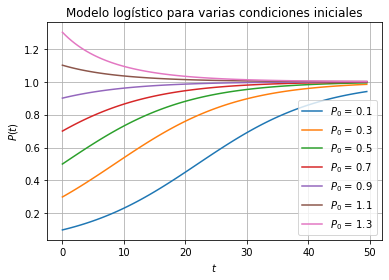

In [6]:
tiempo = arange(0,50,0.5)
pob_ini_s = arange(0.1,1.5,0.2)
title("Modelo logístico para varias condiciones iniciales"),xlabel(r"$t$"),ylabel(r"$P(t)$")
for pob_ini in pob_ini_s:
    sol_num = RK_2(modelo_logistico,[pob_ini],tiempo)
    plot(tiempo,sol_num,label=r"$P_0$ = %2.1f" %pob_ini)
legend(),grid()
show()

Probemos también con el caso de la ecuación del péndulo:

In [7]:
def pendulo(t_vt,t,omega0 = 1):
    dth = t_vt[1]
    dv_th = -omega0*sin(t_vt[0])
    return array([dth,dv_th])

El resultado para diferentes condiciones iniciales del tipo $(\theta_0,0)$

In [8]:
tiempo = arange(0,5*pi,0.05)
sol_num = RK_2(pendulo,[1,0],tiempo)

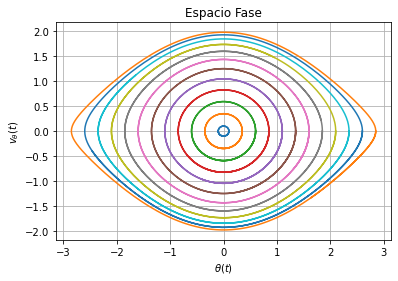

In [9]:
title("Espacio Fase"),xlabel(r"$\theta(t)$"),ylabel(r"$v_{\theta}(t)$")
tiempo = arange(0,5*pi,0.05)
th_ini_s = arange(0.1,pi-0.1,0.25)
for th_ini in th_ini_s:
    sol_num = RK_2(pendulo,[th_ini,0],tiempo)
    plot(sol_num[:,0],sol_num[:,1])
grid()
show()

El algoritmo anterior también funciona para situaciones donde se tienen sistemas no autónomos como el péndulo amortiguado y forzado. La función que representa este último sistema es:

In [10]:
def pendulo_ff(t_vt,t,param=[1,0.1,0.1,0.1]):
    # t_vt = [ theta , v_theta ]
    # param = [ omega 0 , gamma , A , omega 1]
    omega0,gamma,A,omega1 = param
    dth = t_vt[1]
    dv_th = -omega0*sin(t_vt[0]) - gamma*t_vt[1] + A*cos(omega1*t)
    return array([dth,dv_th])

El resultado para un amortiguamiento $\gamma = 0.1$, amplitud $A=1$ y frecuencia de forzamiento $\omega_1 =0.1$ es el siguiente: 

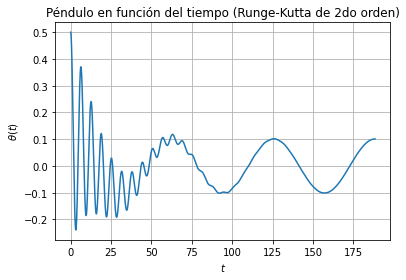

In [11]:
title("Péndulo en función del tiempo (Runge-Kutta de 2do orden)"),xlabel(r"$t$"),ylabel(r"$\theta(t)$")
tiempo = arange(0,60*pi,0.01)
sol_num_rk2 = RK_2(pendulo_ff,[0.5,0.0],tiempo)
plot(tiempo,sol_num_rk2[:,0])
grid()
show()

Como se puede observar, los resultados que se encuentran son iguales que con el algoritmo de `Euler_mejorado_J_t_p` pero con la ventaja de que es mucho más fácil de programar.

#### Método de Runge-Kutta de 4to orden

Un algoritmo con una mejor precisión es el método de Runge-Kutta de 4to orden dado por el siguiente algoritmo:

$$
\begin{eqnarray}
\vec x_{n+1} &=& \vec x_{n} + \frac{1}{6}\delta (k_1 + 2k_2 + 2k_3 +k_4) \\
t_{n+1} &=& t_n + \delta \\
\vec k_1 &=& \vec g\left( \vec x_n , t_n \right) \\
\vec k_2 &=& \vec g\left( \vec x_n + \delta \frac{\vec k_1}{2}, t_n +\frac{\delta}{2} \right) \\
\vec k_3 &=& \vec g\left( \vec x_n + \delta \frac{\vec k_2}{2}, t_n +\frac{\delta}{2} \right) \\
\vec k_4 &=& \vec g\left( \vec x_n + \delta \vec k_3, t_n +\delta\right)
\end{eqnarray}
$$

La implementación del algoritmo anterior se realiza con la siguiente función:

In [12]:
def RK_4(edo,x_ini,t):
    sol = zeros( (len(t) , len(x_ini)) )
    sol[0,:] = x_ini
    delta = t[1]-t[0]
    for i in range(0,len(t)-1):
        k1 = edo(sol[i,:],t[i])
        k2 = edo(sol[i,:] + 0.5*delta*k1 , t[i] + 0.5*delta)
        k3 = edo(sol[i,:] + 0.5*delta*k2 , t[i] + 0.5*delta)
        k4 = edo(sol[i,:] + delta*k2 , t[i] + delta)
        sol[i+1,:] = sol[i,:] + (delta/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    return sol

Probemos el algoritmo anterior con el péndulo amortiguado y forzado del ejemplo anterior.

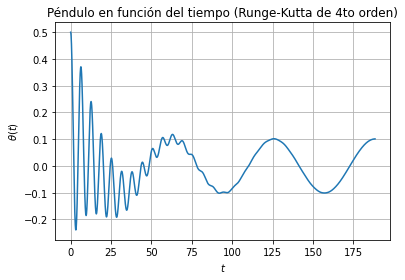

In [13]:
title("Péndulo en función del tiempo (Runge-Kutta de 4to orden)"),xlabel(r"$t$"),ylabel(r"$\theta(t)$")
tiempo = arange(0,60*pi,0.01)
sol_num_rk4 = RK_4(pendulo_ff,[0.5,0.0],tiempo)
plot(tiempo,sol_num_rk2[:,0])
grid()
show()

Calculemos el error relativo entre cada uno de los métodos de Runge-Kutta. Para ello calculemos el valor absoluto de la diferencia entre cada una de las soluciones numéricas.

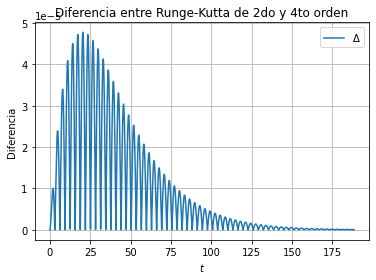

In [14]:
title("Diferencia entre Runge-Kutta de 2do y 4to orden"),xlabel(r"$t$"),ylabel("Diferencia")
plot(tiempo,abs(sol_num_rk2[:,0]-sol_num_rk4[:,0]),label=r"$\Delta$")
grid(),legend()
show()

Como se puede observar, la diferencia entre los métodos de integración es de $10^{-5}$, lo que quiere decir que el método de 4to orden es 5 órdenes de magnitud más preciso que el de segundo orden. Como era de esperarse, la mayor diferencia se encuentra en la zona con mayor número de oscilaciones de la solución.

[Regresar a la página del curso.](http://sistemas.fciencias.unam.mx/~rich/FisComp/)

Se agradece el apoyo del proyecto DGAPA-PAPIME:

+ PE 103021 nueva versión durante el año 2022. Versión interactiva en Colab.
+ PE 112919 durante el año 2020. Idea original.